# Bizning datamiz "house_price" data bolib bizning maqsadimiz "totalPrice" bashorot 
# Bini regression algoritmlaridan model yasab yaxshi model yasab, bu modelimiz kelajakdagi uylarni narxirni bashorat qilib beradi

In [ ]:
# men bu yerda foydalangan algorithmlarim  men bu yerda ularni hammasini sinab yaxshi natija olishga harakat qildim

#  LinearRegression  
# MSE (Xatolik): 4421.431664565771
# R² (Tushuntirilgan dispersiya): 0.80

#  DecisionTreeRegressor
# MSE: 4038.0789418044606
# R2: 0.8186567196217691

#  RandomForestRegressor
# MSE: 1336.923653373047
# R2: 0.9403034475817191

#  SVR (Support Vector Regression)


# Umumiy natijani korsak "RandomForestRegressor" eng yaxshi natijani qayd etdi

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('house_price.txt')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283900 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

In [7]:
# bizda bu yerda non qiymatlarimiz bor , bazi qiymatlarnimiz tushib qolgan 
# biz ularni toldirib chiqamiz
df.isnull().sum()

Unnamed: 0               0
Lng                      1
Lat                      0
tradeTime                0
followers                0
totalPrice               0
square                   0
livingRoom               0
drawingRoom              0
kitchen                  0
bathRoom                 0
constructionTime         0
ladderRatio              0
fiveYearsProperty        0
subway                   0
communityAverage         0
floor_height             0
renovationCondition_2    0
renovationCondition_3    0
renovationCondition_4    0
buildingStructure_2      0
buildingStructure_3      0
buildingStructure_4      0
buildingStructure_5      0
buildingStructure_6      0
buildingType_2.0         0
buildingType_3.0         0
buildingType_4.0         0
district_2               0
district_3               0
district_4               0
district_5               0
district_6               0
district_7               0
district_8               0
district_9               0
district_10              0
d

In [8]:
# bu yerda biz tushurib qoldirilgan qiymatimiz oobject bolsa mode bilan toldir
# yoli mean bilan toldil deb aytayapmiz
def tozala(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype=='object':
                df[col].fillna(df[col].mode()[0],inplace=True)
            else:
                df[col].fillna(df[col].mean(),inplace=True)
    return df

In [9]:
# endi korib turganimizdek bizni tushurib qoldirilgan qiymatlarimiz hammasi toldirildi
# yani hammasi columslarimiz 891 tadan boldi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283900 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

In [10]:
# Biz endi labelencoding qilayapmiz yani bizni datalarda object qiymatlar bolsa ullarni
# float bilan int qiymatlarga ajratayapmiz

from sklearn.preprocessing import LabelEncoder

In [11]:
def encodlash(df):
    df = df.copy() 
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].nunique() <= 6:
                dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
                df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
            else:
                df[col] = le.fit_transform(df[col])
    
    return df


In [12]:
df=encodlash(df)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
standart_scaler=StandardScaler()

In [15]:
def scaling_qil(df):
    numerical_col=df.select_dtypes(include=['int32','int64','float64']).columns.drop('totalPrice')
    df[numerical_col]=standart_scaler.fit_transform(df[numerical_col])
    return df

In [16]:
df=scaling_qil(df)

In [17]:
df.head()

,Unnamed: 0,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,-1.750975,-3.077065,0.750755,0.757725,2.591319,415.0,1.636200,0.045206,-0.297015,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,1.888642
1,-1.750964,0.308280,-0.733525,0.757725,3.171573,575.0,1.680110,0.045206,1.699595,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,1.888642
2,-1.750942,0.167089,1.359522,0.757725,3.519726,297.5,1.731657,1.402143,-0.297015,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,0.892755,-0.4987,3.371525,-0.057514,-0.372451,-0.529481
3,-1.750931,0.081719,-0.683022,0.757725,7.813605,392.0,0.045247,0.045206,-0.297015,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,-1.120128,-0.4987,-0.296602,-0.057514,-0.372451,-0.529481
4,-1.750920,0.418015,0.447877,0.757725,1.169697,275.6,-0.845686,-1.311731,-2.293625,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,-0.529481


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  float64
 1   Lng                    283900 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  float64
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

In [19]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.median())


In [20]:
x = df.drop(['totalPrice'], axis=1)
y = df[['totalPrice']]


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# nan qiymat borligini aniqlab beradi
# print("X_train NaN bormi? ->", x_train.isnull().sum().sum())
# print("y_train NaN bormi? ->", y_train.isnull().sum())

In [30]:
# Oddiy: NaN larni ustun medianasi bilan to‘ldirish
# x_train = x_train.fillna(x_train.median())
# x_test = x_test.fillna(x_test.median())


In [36]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.median())

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [39]:
model_pred=model.predict(x_test)


Text(0, 0.5, 'y_pred')

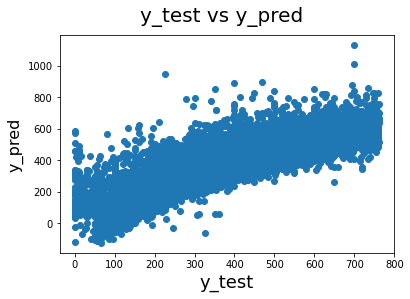

In [40]:
fig = plt.figure()
plt.scatter(y_test,model_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

In [33]:
model_pred

array([[330.78640104],
       [264.81459772],
       [ 98.94423932],
       ...,
       [469.0152889 ],
       [247.41362959],
       [179.76728438]])

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
print("MSE (Xatolik):", mean_squared_error(y_test, model_pred))
print("R² (Tushuntirilgan dispersiya):", r2_score(y_test, model_pred))

MSE (Xatolik): 4421.431664565771
R² (Tushuntirilgan dispersiya): 0.8025734480337239


# Support Vector Mochine
# SVR 
# SVC

In [69]:
import pandas as pd 
df=pd.read_csv('house_price.txt')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283900 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

In [71]:
def tozala(df):
    for col in df.columns:
        if df[col].isnull().any():

            if df[col].dtype=='object':
                df[col].fillna(df[col].mode()[0],inplace=True)
            else:
                df[col].fillna(df[col].mean(),inplace=True)

    return df
    

In [72]:
tozala(df)

,Unnamed: 0,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,0,0.000000,0.627253,2016,0.092738,415.0,0.272992,0.250,0.2,0.333333,...,0,0,0,0,1,0,0,0,0,1
1,1,0.597040,0.406733,2016,0.110236,575.0,0.276039,0.250,0.4,0.333333,...,0,0,0,0,1,0,0,0,0,1
2,3,0.572140,0.717698,2016,0.120735,297.5,0.279617,0.375,0.2,0.333333,...,0,0,0,0,1,0,1,0,0,0
3,4,0.557084,0.414236,2016,0.250219,392.0,0.162585,0.250,0.2,0.333333,...,0,0,0,0,0,0,0,0,0,0
4,5,0.616393,0.582255,2016,0.049869,275.6,0.100757,0.125,0.0,0.333333,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283896,318845,0.742592,0.204891,2016,0.006999,355.5,0.280058,0.375,0.4,0.333333,...,0,0,0,0,1,0,0,0,0,0
283897,318846,0.742592,0.204891,2016,0.006999,350.0,0.359264,0.375,0.4,0.333333,...,0,0,0,0,0,0,0,0,0,0
283898,318847,0.665223,0.292595,2016,0.000875,108.8,0.061210,0.125,0.0,0.333333,...,0,0,0,0,1,0,0,0,0,0
283899,318848,0.664882,0.282952,2016,0.001750,359.0,0.209332,0.250,0.4,0.333333,...,0,0,0,0,1,0,0,0,0,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283901 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

In [74]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()

In [75]:
def encodlash(df):
    for col in df.columns:
        if df[col].dtype=='object':
            if df[col].nunique()<=6:
                dummies=pd.get_dummies(df[col],prefix=col,dtype=int)
                df=pd.concat([df.drop(columns=[col]),dummies],axis=1)
            else:
                df[col]=encoding.fit_transform(df[col])
    return df


In [76]:
df=encodlash(df)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283901 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

In [78]:
from sklearn.preprocessing import StandardScaler
standart_scaler=StandardScaler()
def scaling_qil(df):
    numerical_col=df.select_dtypes(include=['int32','int64','float64']).columns.drop('totalPrice')
    df[numerical_col]=standart_scaler.fit_transform(df[numerical_col])
    return df
    


In [79]:
df=scaling_qil(df)

In [80]:
df.head()

,Unnamed: 0,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,-1.750975,-3.077070,0.750755,0.757725,2.591319,415.0,1.636200,0.045206,-0.297015,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,1.888642
1,-1.750964,0.308281,-0.733525,0.757725,3.171573,575.0,1.680110,0.045206,1.699595,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,1.888642
2,-1.750942,0.167089,1.359522,0.757725,3.519726,297.5,1.731657,1.402143,-0.297015,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,0.892755,-0.4987,3.371525,-0.057514,-0.372451,-0.529481
3,-1.750931,0.081720,-0.683022,0.757725,7.813605,392.0,0.045247,0.045206,-0.297015,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,-1.120128,-0.4987,-0.296602,-0.057514,-0.372451,-0.529481
4,-1.750920,0.418015,0.447877,0.757725,1.169697,275.6,-0.845686,-1.311731,-2.293625,0.06223,...,-0.320501,-0.210683,-0.075685,-0.179334,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,-0.529481


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x=df.drop('totalPrice',axis=1)
y=df['totalPrice']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [85]:
from sklearn.svm import SVR

In [86]:
model=SVR(kernel='linear')

In [87]:
model

SVR(kernel='linear')

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model_pred= model.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score, r2_score

In [66]:
class_score=r2_score(y_test,pred)

In [ ]:
print("MSE (Xatolik):", mean_squared_error(y_test, model_pred))
print("R² (Tushuntirilgan dispersiya):", r2_score(y_test, model_pred))

In [ ]:
class_score

# RandomForestRegressor bilan siansh


In [61]:

y = df['totalPrice']
x = df.drop(columns=['totalPrice'])  


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:

#  RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [64]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [65]:
# Baholash
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
y_pred = model.predict(x_test)

In [67]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 1336.923653373047
R2: 0.9403034475817191


# DecisionTreeRegressor orqali tekshirish

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

y = df['totalPrice']

x = df.drop(columns=['totalPrice', 'Unnamed: 0'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Baholash
y_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 4038.0789418044606
R2: 0.8186567196217691
